# РАБОТА и СРАВНЕНИЕ ЦВЕТОВЫХ ПРОСТРАНСТВ RGB и Lab

## ЗАГРУЗКА ИСХОДНОГО ИЗОБРАЖЕНИЯ  и ВЫВОД в форматах INT и FLOAT

IMAGE SHAPE (447, 605, 3) IMAGE SIZE 811305
ROWS NUMBER 447 CLMS NUMBER 605 PIX NUMBER 270435 Bins 256
MAX_COLOR 255


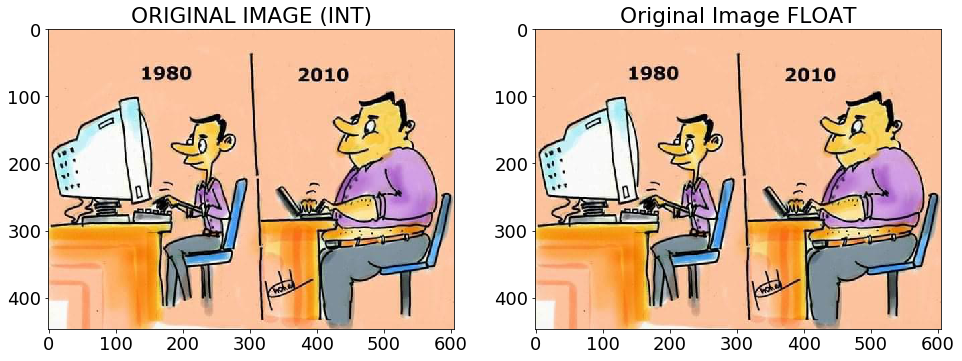

In [28]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

## Завантаження файлу зображення
## filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
filename = 'Test_001.jpg'
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)

rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

max_color = test_im.max()
print ('MAX_COLOR', max_color)

test_im_float = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)
test_im_float = np.float32(test_im.copy())
test_im_float[:,:,:] /= 256.0
# print (test_im_float[10,10,:])

## Вивід оррігінального зображення на екран
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].set_title('ORIGINAL IMAGE (INT)')
ax[0].imshow(test_im)
ax[1].set_title("Original Image FLOAT")
ax[1].imshow(test_im_float)
plt.show()


## ПРЕОБРАЗОВАНИЕ в Lab

In [2]:
import skimage.color as co
test_im_LAB = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)
test_im_LAB = co.rgb2lab(test_im_float, illuminant='D65', observer='2')
print (test_im_LAB[10,10,:])

[82.82745084 15.9183094  26.50990825]


## ВЫВОД ПОЛУТНОВОГО  сформирвоанного в RGB и L компонеты Lab

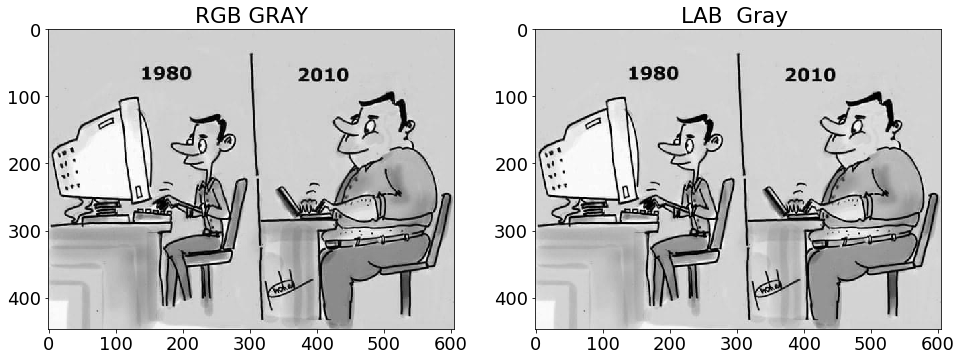

In [6]:
image_out_RGB = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        image_out_RGB [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]
## Вивід перетвореного зображення на екран

image_out_LAB = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)
image_out_LAB[:,:,0] = image_out_LAB[:,:,1] = image_out_LAB[:,:,2] = test_im_LAB[:,:,0]/100.0

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].set_title("RGB GRAY")
ax[0].imshow(image_out_RGB)
ax[1].set_title("LAB  Gray ")
ax[1].imshow(image_out_LAB)
plt.show()


## ОСЛАБЛЕНИЕ изображений и сравнение  RGB и Lab (ослабленных на коэффицент Atten)

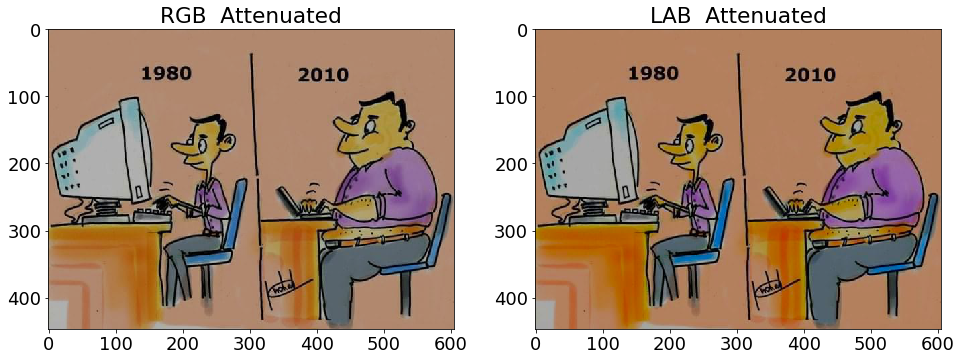

In [27]:
# СРАВНИВАЕМ ОСЛАБЛЕННОЕ ИЗОБРАЖЕНИЕ RGG И ОСЛАБЛЕННОЕ ИЗОБРАЖЕНИЕ Lab
# КОЭФФИЦЕНТ ОСЛАБЛЕНИЯ  Atten

Aten = 0.7

image_out_RGB_trans = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
# в RGB просто все компоненты умножаем на коэффициент
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        image_out_RGB_trans [i, j, :] = np.uint8(Aten*test_im[i, j, :])

# в Lab умножаем на коэффициент компоненту светлоты 
# !!! параметры a b  --  не трогаем
# затем преобразуем в  RGG
image_out_LAB_trans = test_im_LAB.copy()
image_out_LAB_trans[:,:,0] = Aten*test_im_LAB[:,:,0]


image_out_LAB2RGB = np.zeros  ((rows_num, clms_num, 3), dtype = np.float32)
image_out_LAB2RGB = co.lab2rgb(image_out_LAB_trans, illuminant='D65', observer='2')


fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].set_title("RGB  Attenuated")
ax[0].imshow(image_out_RGB_trans)
ax[1].set_title("LAB  Attenuated")
ax[1].imshow(image_out_LAB2RGB)
plt.show()
